In [1]:
import re
import networkx as nx

In [7]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title') + " " + df.get('Description')
galexy_post_date = df.get('Post Date')

In [8]:
from eunjeon import Mecab
tagger = Mecab()

galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [9]:
galexy_nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)
            
galexy_nouns[0:10]

['삼성', '더블', '갤럭시', '특징', '사전', '예약', '새벽', '삼성', '갤럭시', '언']

In [10]:
from collections import Counter
num_top_nouns = 20
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))

In [11]:
galexy_sentences = []
for post in galexy_posts:
    galexy_sentences.extend(re.split('; |\.|\?|\!', post))
galexy_sentences[0:10]

['삼성 폴더블폰 갤럭시f 특징, 사전예약은',
 ' wapotv',
 'com 2월 21일 새벽 4시에 삼성 갤럭시s10 언팩에서 공개된 갤럭시 폴드 영상 및 리뷰입니다',
 ' (새로 작성했어요~) 삼성전자는 2월 20일 미국 캘리포니아에서 개최될 갤럭시S10 언팩에서 갤럭시f(가칭)을 함께',
 '',
 '',
 ' ',
 '삼성 갤럭시 폴드 디자인 스펙 가격 출시일 언팩 행사에서 공개 할여했던 삼성 갤럭시 폴드의 디자인, 스펙, 가격, 출시일을 알아보도록 하겠습니다',
 ' 세계 최초는',
 '']

In [12]:
galexy_sentences_nouns = []
for sentence in galexy_sentences:
    sentence_nouns = tagger.nouns(sentence)
    galexy_sentences_nouns.append(sentence_nouns)
galexy_sentences_nouns[0:10]

[['삼성', '폴', '더블', '폰', '갤럭시', '특징', '사전', '예약'],
 [],
 ['월', '일', '새벽', '시', '삼성', '갤럭시', '언', '팩', '공개', '갤럭시', '폴드', '영상', '리뷰'],
 ['작성', '삼성전자', '월', '일', '미국', '캘리포니아', '개최', '갤럭시', '언', '팩', '갤럭시', '가칭'],
 [],
 [],
 [],
 ['삼성',
  '갤럭시',
  '폴드',
  '디자인',
  '스펙',
  '가격',
  '출시',
  '일',
  '팩',
  '행사',
  '공개',
  '할여',
  '삼성',
  '갤럭시',
  '폴드',
  '디자인',
  '스펙',
  '가격',
  '출시',
  '일'],
 ['세계', '최초'],
 []]

In [13]:
galexy_word2id = {w: i for i, w in enumerate(galexy_top_nouns.keys())}
galexy_word2id

{'갤럭시': 0,
 '삼성': 1,
 '스마트폰': 2,
 '삼성전자': 3,
 '출시': 4,
 '폴드': 5,
 '노트': 6,
 '워치': 7,
 '공개': 8,
 '플러스': 9,
 '사용': 10,
 '카메라': 11,
 '더블': 12,
 '모델': 13,
 '스펙': 14,
 '가격': 15,
 '시리즈': 16,
 '이번': 17,
 '제품': 18,
 '기능': 19}

In [14]:
galexy_id2word = {i: w for i, w in enumerate(galexy_top_nouns.keys())}
galexy_id2word

{0: '갤럭시',
 1: '삼성',
 2: '스마트폰',
 3: '삼성전자',
 4: '출시',
 5: '폴드',
 6: '노트',
 7: '워치',
 8: '공개',
 9: '플러스',
 10: '사용',
 11: '카메라',
 12: '더블',
 13: '모델',
 14: '스펙',
 15: '가격',
 16: '시리즈',
 17: '이번',
 18: '제품',
 19: '기능'}

In [15]:
import numpy as np
galexy_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in galexy_sentences_nouns:
    for wi, i in galexy_word2id.items():
        if wi in sentence:
            for wj, j in galexy_word2id.items():
                if i != j and wj in sentence:
                    galexy_adjacent_matrix[i][j] += 1
galexy_adjacent_matrix

array([[   0, 1655,  304,  284,  223,  205,  166,  127,  163,  144,  143,
         120,  122,  121,  121,  109,  119,  107,   79,   89],
       [1655,    0,  261,  113,  179,  152,  125,   98,  121,  112,  116,
          95,  101,   92,  100,   97,   80,   80,   63,   82],
       [ 304,  261,    0,   92,   40,   41,   17,    5,   36,   21,   33,
          29,   47,   32,    8,   12,   22,   15,   15,   18],
       [ 284,  113,   92,    0,   42,   44,   21,   21,   71,   21,   10,
          16,   42,   18,   12,   13,   33,   16,   19,   12],
       [ 223,  179,   40,   42,    0,   27,   11,   12,   16,   15,   12,
          14,   19,   20,   26,   29,   26,   24,   15,    5],
       [ 205,  152,   41,   44,   27,    0,    0,    3,   65,    1,    5,
           5,   86,    2,   19,   18,    9,   14,    7,    2],
       [ 166,  125,   17,   21,   11,    0,    0,   10,   11,   11,   18,
           4,    0,    7,    4,    7,   11,    5,    8,    5],
       [ 127,   98,    5,   21,   12,    

In [16]:
galexy_network = nx.from_numpy_matrix(galexy_adjacent_matrix)
list(galexy_network.adjacency())

[(0,
  {1: {'weight': 1655},
   2: {'weight': 304},
   3: {'weight': 284},
   4: {'weight': 223},
   5: {'weight': 205},
   6: {'weight': 166},
   7: {'weight': 127},
   8: {'weight': 163},
   9: {'weight': 144},
   10: {'weight': 143},
   11: {'weight': 120},
   12: {'weight': 122},
   13: {'weight': 121},
   14: {'weight': 121},
   15: {'weight': 109},
   16: {'weight': 119},
   17: {'weight': 107},
   18: {'weight': 79},
   19: {'weight': 89}}),
 (1,
  {0: {'weight': 1655},
   2: {'weight': 261},
   3: {'weight': 113},
   4: {'weight': 179},
   5: {'weight': 152},
   6: {'weight': 125},
   7: {'weight': 98},
   8: {'weight': 121},
   9: {'weight': 112},
   10: {'weight': 116},
   11: {'weight': 95},
   12: {'weight': 101},
   13: {'weight': 92},
   14: {'weight': 100},
   15: {'weight': 97},
   16: {'weight': 80},
   17: {'weight': 80},
   18: {'weight': 63},
   19: {'weight': 82}}),
 (2,
  {0: {'weight': 304},
   1: {'weight': 261},
   3: {'weight': 92},
   4: {'weight': 40},
   5:

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="./font/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}
nx.draw(galexy_network, labels=galexy_id2word, font_family=font_name, ax=ax, **option)

c:\python\venv\tensorflow\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


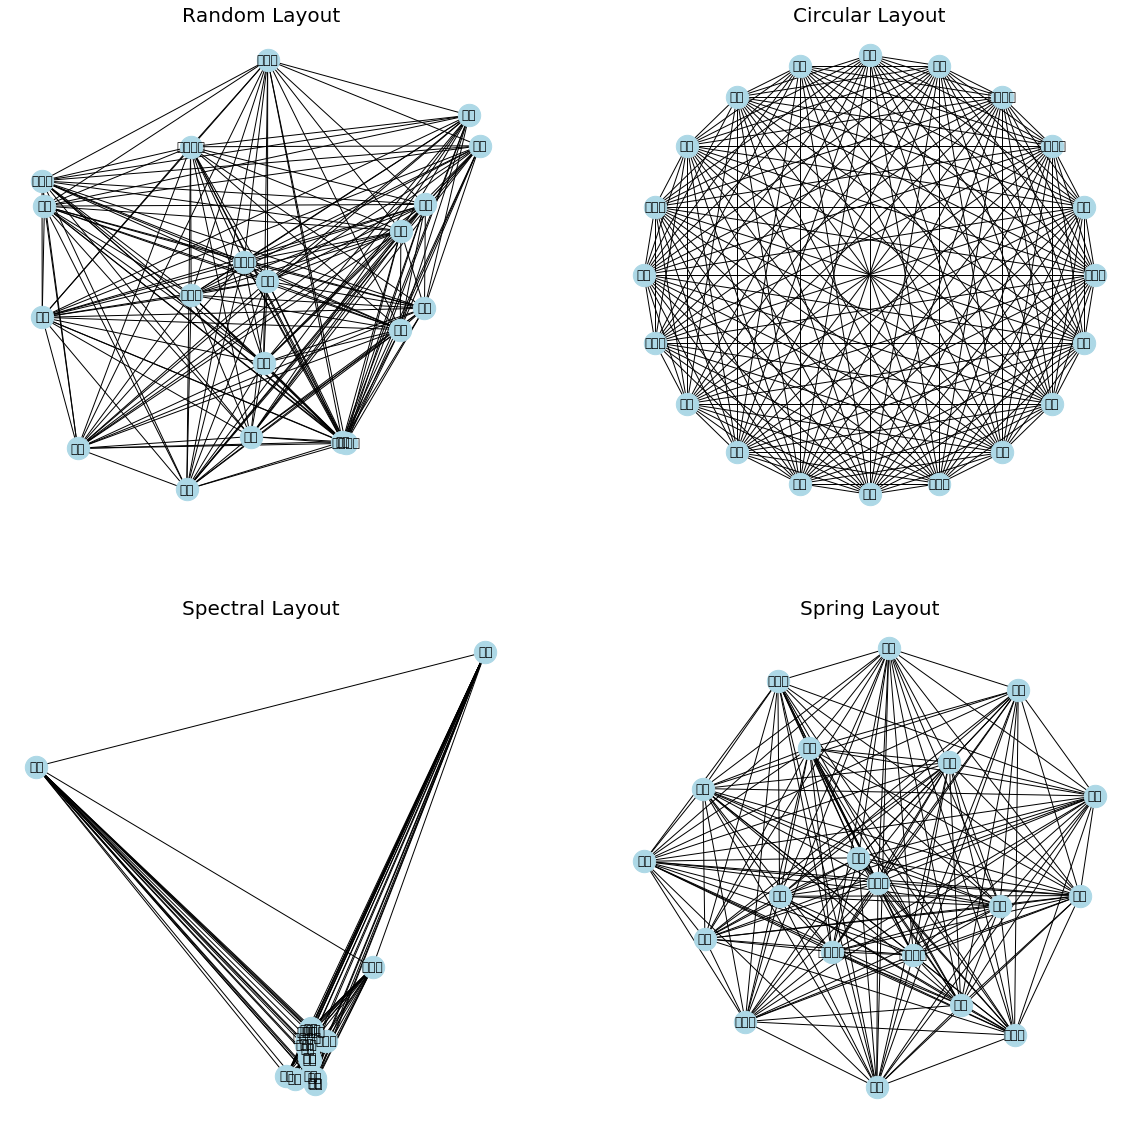

In [18]:
fig = plt.figure()
fig.set_size_inches(20, 20)
option = {
    'node_color' : 'lightblue',
    'node_size' : 500,
    'size' : 100
}

plt.subplot(221)
plt.title('Random Layout', fontsize=20)
nx.draw_random(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(222)
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(223)
plt.title('Spectral Layout',fontsize=20)
nx.draw_spectral(galexy_network, labels=galexy_id2word, font_family=font_name, **option)
plt.subplot(224)
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(galexy_network, labels=galexy_id2word, font_family=font_name, **option)

In [19]:
#Degree
nx.degree_centrality(galexy_network)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 0.9473684210526315,
 6: 0.894736842105263,
 7: 0.894736842105263,
 8: 1.0,
 9: 0.9473684210526315,
 10: 1.0,
 11: 0.894736842105263,
 12: 0.9473684210526315,
 13: 0.9473684210526315,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0}

In [20]:
#Eigenvector
nx.eigenvector_centrality(galexy_network, weight='weight')

{0: 0.6476028215713436,
 1: 0.6267333610643456,
 2: 0.1986401197448892,
 3: 0.15089056965543302,
 4: 0.14193542426084393,
 5: 0.12928245391440812,
 6: 0.09770064774012936,
 7: 0.07546389728150349,
 8: 0.10716880200650308,
 9: 0.0875164878957325,
 10: 0.08963794002348108,
 11: 0.07469765956405948,
 12: 0.08690329110262894,
 13: 0.07504661917975147,
 14: 0.07775712929341577,
 15: 0.07385180707360109,
 16: 0.07320945008812452,
 17: 0.06704259997950643,
 18: 0.05167888194283943,
 19: 0.05934406340708837}

In [21]:
#Closeness
nx.closeness_centrality(galexy_network, distance='weight')

{0: 0.011404561824729893,
 1: 0.013788098693759071,
 2: 0.06168831168831169,
 3: 0.04656862745098039,
 4: 0.06168831168831169,
 5: 0.07916666666666666,
 6: 0.06884057971014493,
 7: 0.0871559633027523,
 8: 0.07661290322580645,
 9: 0.08050847457627118,
 10: 0.08050847457627118,
 11: 0.0871559633027523,
 12: 0.09134615384615384,
 13: 0.08482142857142858,
 14: 0.08189655172413793,
 15: 0.06810035842293907,
 16: 0.0708955223880597,
 17: 0.07335907335907337,
 18: 0.0778688524590164,
 19: 0.0871559633027523}

In [22]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(galexy_network)

{0: 0.5184538714278664,
 1: 0.5184538714278664,
 2: 0.5184538714278663,
 3: 0.5184538714278664,
 4: 0.5184538714278664,
 5: 0.5038952462217977,
 6: 0.48864893805118936,
 7: 0.4886028986887093,
 8: 0.5184538714278665,
 9: 0.5038951105937511,
 10: 0.5184538714278665,
 11: 0.48860289868870915,
 12: 0.5038952462217978,
 13: 0.5038951105937516,
 14: 0.5184538714278663,
 15: 0.5184538714278663,
 16: 0.5184538714278663,
 17: 0.5184538714278663,
 18: 0.5184538714278663,
 19: 0.5184538714278663}

In [23]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(galexy_network)

{0: 0.05307708355956934,
 1: 0.0530770835595693,
 2: 0.053077083559569235,
 3: 0.053077083559569235,
 4: 0.05307708355956911,
 5: 0.051832947996689846,
 6: 0.050972842734856416,
 7: 0.05062692751881404,
 8: 0.0530770835595693,
 9: 0.05184746520284347,
 10: 0.053077083559569214,
 11: 0.05062692751881404,
 12: 0.05183294799668999,
 13: 0.05184746520284353,
 14: 0.053077083559569256,
 15: 0.053077083559569235,
 16: 0.053077083559569097,
 17: 0.053077083559569256,
 18: 0.053077083559569235,
 19: 0.053077083559569235}

In [24]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(galexy_network)

{0: 0.6211327112437807,
 1: 0.6211327112437809,
 2: 0.6211327112437809,
 3: 0.6211327112437809,
 4: 0.6211327112437804,
 5: 0.5833529062124498,
 6: 0.5404665989109708,
 7: 0.5423849555938878,
 8: 0.6211327112437803,
 9: 0.583264951324707,
 10: 0.6211327112437804,
 11: 0.5423849555938878,
 12: 0.5833529062124495,
 13: 0.5832649513247071,
 14: 0.6211327112437801,
 15: 0.62113271124378,
 16: 0.62113271124378,
 17: 0.6211327112437799,
 18: 0.62113271124378,
 19: 0.62113271124378}